In [1]:
## Python dependencies 
import matplotlib.pyplot as plt
import matplotlib.colors as col
import numpy as np
import pandas as pd

In [2]:
# My Dependencies
from Samples.Data      import Data
from Plotter.Helper    import Helper
from Plotter.Plotter   import Plotter
from Cuts.Cuts         import Cuts

Welcome to JupyROOT 6.16/00


/home/jcordero/CMS/SMP_ZGamma/envSMP/lib/python3.6/site-packages/root_numpy/__init__.py:46: RuntimeWarning: numpy 1.14.3 is currently installed but you installed root_numpy against numpy 1.9.3. Please consider reinstalling root_numpy for this numpy version.
  RuntimeWarning)


In [3]:
from scipy.optimize  import curve_fit
from scipy.special   import erf, betainc, gamma
from scipy           import asarray as ar,exp
from numpy.random    import uniform
from scipy           import stats
from scipy.integrate import simps
import array

from root_pandas import read_root 

# External Dependencies
from ROOT import TFile, TTree

In [4]:
import os, datetime

In [5]:
def dirStructure(figpath):
    date = datetime.datetime.now()
    fileName = str(date.year) + str(date.month) + str(date.day) + "/"
    
    try:
        os.mkdir(figpath+fileName)    
    except:
        print("Directory "+fileName+ " already exist")

    
    dirSubStructure(figpath + fileName + "Stacked/")
    dirSubStructure(figpath + fileName + "Unstacked/")
    
    dirSubStructure(figpath + fileName + "nJets/")
    for i in range(5):
        dirSubStructure(figpath + fileName + "nJets/Stacked_nJets"+str(i)+"/")
        dirSubStructure(figpath + fileName + "nJets/Unstacked_nJets"+str(i)+"/")
    
    return figpath+fileName  

def dirSubStructure(path):
    try:
        os.mkdir(path)
    except:
        print("Subdirectory for " + path + " already exists or failed.")
    
    try:
        os.mkdir(path+"log")
        os.mkdir(path+"log/Mult")
        os.mkdir(path+"linear")
        os.mkdir(path+"linear/Mult")
    except:
        print("Subdirectory for " + path + " already exists or failed.")

# Analysis

In [6]:
selection = 'mumug'
#selection = 'elelg'
#selection = 'ee'

#era = "2016"
era = "2017"

if selection == "mumug" or selection == "elelg":
    if era == "2016":
        run = ['B','C','D','E','F','G','H']
        #DataGen = 'rereco'
        DataGen = 'legacy'
        if DataGen == 'legacy':
            #SampleSet = 'MatchZGpaper'
            #SampleSet = 'Rerun'
            SampleSet = 'Correction'
        else:
            SampleSet = 'MatchZGpaper_newAna'
    elif era == "2017":
        run = ['B','C','D','E','F']
        DataGen = 'rereco'
        #SampleSet = 'V1'
        #SampleSet = 'V2_puWeight'
        #SampleSet = 'V2_puWeight_phID'
        #SampleSet = 'V4_phID_isConv'
        #SampleSet = 'V4_phID_isConv_MINUIT'
        SampleSet = 'V6_lPhoton'
        
    LoadVars = [
            'runNumber','evtNumber',
            'nPV','nPU','Rho', 'met',
            'genWeight','eventWeight','puWeight','triggerWeight','photonIDWeight',"photonIsConvWeight",
            'leptonOnePt','leptonOneEta','leptonOnePhi','leptonOneIso','leptonOneCharge',
            'leptonTwoPt','leptonTwoEta','leptonTwoPhi','leptonTwoIso','leptonTwoCharge',
            'photonOnePt','photonOneEta','photonOnePhi',
            'photonOneR9','photonOneMVA','photonOneERes','photonOneSieie',
            'photonOneHoverE','photonOneIneu','photonOneIph','photonOneIch',
            'photonOneSieip','photonOneSipip','photonOneSrr','photonOneE2x2','photonOneE5x5',
            'photonOneScEtaWidth','photonOneScPhiWidth',
            'photonOneScRawE','photonOnePreShowerE','photonOneScBrem',
            'genPhotonPt','genPhotonEta','genPhotonPhi',
            'vetoDY','genIsoPass',
            'dileptonPt','dileptonEta','dileptonPhi','dileptonM',
            'llgPt','llgEta','llgPhi','llgM',
            'dileptonDEta','dileptonDPhi','dileptonDR',
            'l1PhotonDEta','l1PhotonDPhi','l1PhotonDR',
            'l2PhotonDEta','l2PhotonDPhi','l2PhotonDR',
            'dileptonPhotonDEta','dileptonPhotonDPhi','dileptonPhotonDR',
            'nMuons','nElectrons','nPhotons','nJets',#'nTaus','nBJets',
            'passElectronVeto',
            ]
elif selection == "ee":
    if era == "2016":
        run = ['B','C','D','E','F','G','H']
        #DataGen = 'rereco'
        DataGen = 'legacy'
        if DataGen == 'legacy':
            #SampleSet = 'MatchZGpaper'
            #SampleSet = 'Rerun'
            SampleSet = 'Correction'
        else:
            SampleSet = 'MatchZGpaper_newAna'
    elif era == "2017":
        run = ['B','C','D','E','F']
        DataGen = 'rereco'
        SampleSet = 'EfficiencyCorrection/files_zee/V4_phID_isConv'    
    
    LoadVars = [
            'runNumber','evtNumber',
            'nPV','nPU','Rho', 
            #'eventWeight','puWeight',
            'genWeight','triggerWeight','photonIDWeight',
            #'leptonOnePt','leptonOneEta','leptonOnePhi','leptonOneCharge',
            #'leptonTwoPt','leptonTwoEta','leptonTwoPhi','leptonTwoCharge',
            #'photonOnePt','photonOneEta','photonOnePhi',
            'photonOneEta',
            #'photonOneR9','photonOneMVA','photonOneERes','photonOneSieie',
            #'photonOneHoverE','photonOneIneu','photonOneIph','photonOneIch',
            #'photonOneSieip','photonOneSipip','photonOneSrr','photonOneE2x2','photonOneE5x5',
            #'photonOneScEtaWidth','photonOneScPhiWidth',
            #'photonOneScRawE','photonOnePreShowerE','photonOneScBrem',
            #'genPhotonPt',
            #'vetoDY','genIsoPass',
            #'dileptonPt','dileptonEta','dileptonPhi','dileptonM',
            #'nMuons','nElectrons','nTaus','nPhotons','nJets','nBJets',
            #'ProbeIDPass','ProbeISOPass','ProbeWorstPass','ProbeSigPass','ProbeIsConv',
            ]
path    = "/home/jcordero/CMS/data/data_"+era+"/"+DataGen+"/SMP_ZG/Files/"+selection+"/"+SampleSet+"/"
figpath = "/home/jcordero/CMS/SMP_ZGamma/figs/"+era+"/"+DataGen+"/"+selection+"/"
pathSelections = path+"Reduced"

figpath = dirStructure(figpath)


Help    = Helper(era)

Help.SetPath(path)
Help.figpath = figpath

Plotter = Plotter(Help=Help)
Plotter.SetFig(Help.figpath)

Cut = Cuts(path = Help.path)


Directory 202061/ already exist
Subdirectory for /home/jcordero/CMS/SMP_ZGamma/figs/2017/rereco/mumug/202061/Stacked/ already exists or failed.
Subdirectory for /home/jcordero/CMS/SMP_ZGamma/figs/2017/rereco/mumug/202061/Stacked/ already exists or failed.
Subdirectory for /home/jcordero/CMS/SMP_ZGamma/figs/2017/rereco/mumug/202061/Unstacked/ already exists or failed.
Subdirectory for /home/jcordero/CMS/SMP_ZGamma/figs/2017/rereco/mumug/202061/Unstacked/ already exists or failed.
Subdirectory for /home/jcordero/CMS/SMP_ZGamma/figs/2017/rereco/mumug/202061/nJets/ already exists or failed.
Subdirectory for /home/jcordero/CMS/SMP_ZGamma/figs/2017/rereco/mumug/202061/nJets/ already exists or failed.
Subdirectory for /home/jcordero/CMS/SMP_ZGamma/figs/2017/rereco/mumug/202061/nJets/Stacked_nJets0/ already exists or failed.
Subdirectory for /home/jcordero/CMS/SMP_ZGamma/figs/2017/rereco/mumug/202061/nJets/Stacked_nJets0/ already exists or failed.
Subdirectory for /home/jcordero/CMS/SMP_ZGamma

Error in <TFile::TFile>: file output__0.root does not exist


In [7]:
'''
dataSelect = "no DYJets"
data  = [            WJets,             VV,           TT,   DYJets,        ZG, Leptons]
data, legend, colors, dataFlag = Help.SetDataOpt(data, dataSelect = dataSelect,selection = selection)
    
Plotter.SetPlotOpt(legend=legend,colors = colors)
''';

# High Level Functions

In [8]:
def Single_Ploting(Plotter,
                   data,
                   stacked,
                   log,
                   weightCorrection = True,
                   Blind            = True, 
                   Plotting         = True,
                   StatInclude      = False,
                  ):
    #################################################################
    #var = ['nPV','nJets','nBJets','nMuons','nPhotons','met']
    #var = ['nJets','nBJets','nMuons','nPhotons','met']
    #var = ['nJets','nMuons','nPhotons','met']
    var = ['nPV','met']
    for v in var:
        print('----------------'+str(v)+'----------------')
        Plotter.Plot(
                    data,
                    v,
                    part             = '',
                    signalInclude    = True,
                    stacked          = stacked,
                    density          = density,
                    log              = log,
                    weightCorrection = weightCorrection,
                    Blind            = Blind,
                    Plotting         = Plotting,
                    StatInclude      = StatInclude,
                    )
        
    #################################################################
    var = ['Pt','Phi','Eta']
    part = ['leptonOne',
            'leptonTwo','leptonTwo_EE','leptonTwo_EB',
            'photonOne','photonOne_EE','photonOne_EB',
            'dilepton','dilepton_EE','dilepton_EB',
            'llg','llg_EE','llg_EB',
           ]
    '''
    part = ['leptonOne','leptonOne_EE','leptonOne_EB',
            'leptonTwo','leptonTwo_EE','leptonTwo_EB',
            'photonOne','photonOne_EE','photonOne_EB',
            'dilepton','dilepton_EE','dilepton_EB',
            'llg','llg_EE','llg_EB',
           ]
           '''
    for p in part:
        for v in var:
            print('----------------'+p+v+'----------------')
            Plotter.Plot(
                         data,
                         v,
                         part             = p,
                         signalInclude    = True,
                         stacked          = stacked,
                         density          = density,
                         log              = log,
                         weightCorrection = weightCorrection,
                         Blind            = Blind,
                         Plotting         = Plotting,
                         StatInclude      = StatInclude,
                        )   
            
    #################################################################
    var = ['DPhi','DEta','DR']
    part = ['l1Photon','l1Photon_EE','l1Photon_EB',
            'l2Photon','l2Photon_EE','l2Photon_EB',
            'dilepton','dilepton_EE','dilepton_EB',
            'dileptonPhoton','dileptonPhoton_EE','dileptonPhoton_EB',
            ]    
    for p in part:
        for v in var:
            print('----------------'+p+v+'----------------')
            Plotter.Plot(
                         data,
                         v,
                         part             = p,
                         signalInclude    = True,
                         stacked          = stacked,
                         density          = density,
                         log              = log,
                         weightCorrection = weightCorrection,
                         Blind            = Blind,
                         Plotting         = Plotting,
                         StatInclude      = StatInclude,
                        )            
    #################################################################            
    var = ['HoverE','R9','MVA']#,'eres']
    part = ['photonOne','photonOne_EE','photonOne_EB']    
    for p in part:
        for v in var:
            print('----------------'+p+v+'----------------')
            Plotter.Plot(
                         data,
                         v,
                         part             = p,
                         signalInclude    = True,
                         stacked          = stacked,
                         density          = density,
                         log              = log,
                         weightCorrection = weightCorrection,
                         Blind            = Blind,
                         Plotting         = Plotting,
                         StatInclude      = StatInclude,
                        )              
    #################################################################            
    var = ['Ich','Ineu','Iph']
    part = ['photonOne','photonOne_EE','photonOne_EB']                
    for p in part:
        for v in var:
            print('----------------'+p+v+'----------------')
            Plotter.Plot(
                         data,
                         v,
                         part             = p,
                         signalInclude    = True,
                         stacked          = stacked,
                         density          = density,
                         log              = log,
                         weightCorrection = weightCorrection,
                         Blind            = Blind,
                         Plotting         = Plotting,
                         StatInclude      = StatInclude,
                        )        
            
    #################################################################            
    var = ['Srr','Sipip','Sieip','Sieie']
    part = ['photonOne','photonOne_EE','photonOne_EB']                
    for p in part:
        for v in var:
            print('----------------'+p+v+'----------------')
            Plotter.Plot(
                         data,
                         v,
                         part             = p,
                         signalInclude    = True,
                         stacked          = stacked,
                         density          = density,
                         log              = log,
                         weightCorrection = weightCorrection,
                         Blind            = Blind,
                         Plotting         = Plotting,
                         StatInclude      = StatInclude,
                        )        
    #################################################################            
    var = ['E2x2','E5x5','ScEtaWidth','ScPhiWidth','ScRawE','ScBrem','PreShowerE']
    part = ['photonOne','photonOne_EE','photonOne_EB']                
    for p in part:
        for v in var:
            print('----------------'+p+v+'----------------')
            Plotter.Plot(
                         data,
                         v,
                         part             = p,
                         signalInclude    = True,
                         stacked          = stacked,
                         density          = density,
                         log              = log,
                         weightCorrection = weightCorrection,
                         Blind            = Blind,
                         Plotting         = Plotting,
                         StatInclude      = StatInclude,
                        )                    

In [9]:
def Multi_Ploting(Plotter,
                  data,
                  stacked,
                  log,
                  density          = False,
                  customRange      = False,
                  weightCorrection = True,
                  Blind            = True,
                  Plotting         = True,
                  StatInclude      = False,
                 ):
    #################################################################
    var = ['Pt','Phi','Eta']
    part = ['leptonOne','leptonTwo','photonOne_EE','dilepton','llg','photonOne_EB']

    for v in var:

        print('----------------'+str(v)+'----------------')
        Plotter.Plot_Mult(
                          data,
                          var              = v,
                          part             = part,
                          signalInclude    = True,
                          figDim           = [2,3],
                          customRange      = customRange,
                          stacked          = stacked,
                          density          = density,
                          log              = log,
                          weightCorrection = weightCorrection,
                          Plotting         = Plotting,
                          StatInclude      = StatInclude,
                         )
    #################################################################
    var = ['DEta','DPhi','DR']
    part = ['l1Photon','l1Photon_EE','l1Photon_EB','l2Photon','l2Photon_EE','l2Photon_EB','dileptonPhoton','dileptonPhoton_EE','dileptonPhoton_EB','dilepton']    
    for v in var:
        print('----------------'+str(v)+'----------------')
        Plotter.Plot_Mult(
                          data,
                          var              = v,
                          part             = part,
                          signalInclude    = True,
                          figDim           = [4,3],
                          customRange      = customRange,
                          stacked          = stacked,
                          density          = density,            
                          log              = log,
                          weightCorrection = weightCorrection,
                          Plotting         = Plotting,
                          StatInclude      = StatInclude,
                         )    
    #################################################################
    var = ['HoverE','R9','MVA']#,'eres']
    part = ['photonOne','photonOne_EE','photonOne_EB']    
    for v in var:
        print('----------------'+str(v)+'----------------')
        Plotter.Plot_Mult(
                          data,
                          var              = v,
                          part             = part,
                          signalInclude    = True,
                          figDim           = [3,1],
                          customRange      = customRange,
                          stacked          = stacked,
                          density          = density,            
                          log              = log,
                          weightCorrection = weightCorrection,
                          Plotting         = Plotting,
                          StatInclude      = StatInclude,
                         )
    #################################################################
    var = ['Ich','Ineu','Iph']
    part = ['photonOne','photonOne_EE','photonOne_EB']    
    for v in var:
        print('----------------'+str(v)+'----------------')
        Plotter.Plot_Mult(
                          data,            
                          var              = v,
                          part             = part,
                          signalInclude    = True,
                          figDim           = [3,1],
                          customRange      = customRange,
                          stacked          = stacked,
                          density          = density,            
                          log              = log,
                          weightCorrection = weightCorrection,
                          Plotting         = Plotting,
                          StatInclude      = StatInclude,
                         )
    #################################################################
    var = ['M']    
    part = ['dilepton','dilepton_EE','dilepton_EB','llg','llg_EE','llg_EB']
    for v in var:
        print('----------------'+str(v)+'----------------')
        Plotter.Plot_Mult(
                          data,            
                          var              = v,
                          part             = part,
                          signalInclude    = True,
                          figDim           = [2,3],
                          customRange      = customRange,
                          stacked          = stacked,
                          density          = density,            
                          log              = log,
                          weightCorrection = weightCorrection,
                          Plotting         = Plotting,
                          StatInclude      = StatInclude,
                         )
    #################################################################        
    var = ['Srr','Sipip','Sieip','Sieie']
    part = ['photonOne','photonOne_EE','photonOne_EB'] 
    for v in var:
        print('----------------'+str(v)+'----------------')
        Plotter.Plot_Mult(
                          data,            
                          var              = v,
                          part             = part,
                          signalInclude    = True,
                          figDim           = [1,3],
                          customRange      = customRange,
                          stacked          = stacked,
                          density          = density,            
                          log              = log,
                          weightCorrection = weightCorrection,
                          Plotting         = Plotting,
                          StatInclude      = StatInclude,
                         )
    #################################################################
    var = ['E2x2','E5x5','PreShowerE']
    part = ['photonOne','photonOne_EE','photonOne_EB']  
    for v in var:
        print('----------------'+str(v)+'----------------')
        Plotter.Plot_Mult(
                          data,
                          var              = v,
                          part             = part,
                          signalInclude    = True,
                          figDim           = [1,3],
                          customRange      = customRange,
                          stacked          = stacked,
                          density          = density,            
                          log              = log,
                          weightCorrection = weightCorrection,
                          Plotting         = Plotting,
                          StatInclude      = StatInclude,
                         )
    #################################################################
    var = ['ScEtaWidth','ScPhiWidth','ScRawE','ScBrem']
    part = ['photonOne','photonOne_EE','photonOne_EB']  
    for v in var:
        print('----------------'+str(v)+'----------------')
        Plotter.Plot_Mult(
                          data,            
                          var              = v,
                          part             = part,
                          signalInclude    = True,
                          figDim           = [1,3],
                          customRange      = customRange,
                          stacked          = stacked,
                          density          = density,            
                          log              = log,
                          weightCorrection = weightCorrection,
                          Plotting         = Plotting,
                          StatInclude      = StatInclude,
                         )

# Cuts

In [10]:
def STD_Cuts(
            data,
            phType = 'ISR',
            Charge ='oposite',
            Print  = False,
            MVA    = False,
            vetoDY = True,
            ):
    
    [d.ResetCuts() for d in data]
    #---------------------------- CUTS ------------------------------------ CUTS -----------------------

    for d in data:
        #d.AddCuts(np.array(d.df.photonOnePt)>10)
        if Print:
            print('-----------------',d.name,'--------------')
            print('----Total----')
            print(np.sum(d.cuts))
            
        #-------------------------------------------
        if vetoDY and  d.name == 'DYJets':
            d.AddCuts(np.array(d.df.vetoDY)==False)
            
        '''
        #-------------------------------------------
        d.AddCuts(np.array(d.df.l1PhotonDR) > 0.7)
        d.AddCuts(np.array(d.df.l2PhotonDR) > 0.7)
        if Print:
            print('----DR cuts ----')
            print(np.sum(d.cuts))
        '''
        #-------------------------------------------
        if phType == 'ISR':
            # 2 Body to get ISR
            d.AddCuts(np.array(d.df.llgM)+np.array(d.df.dileptonM) > 185)
        elif phType == 'FSR' :
            # 3 Body to get FSR
            d.AddCuts(np.array(d.df.llgM)+np.array(d.df.dileptonM) < 185)
        if Print:
            print('----Mass cuts ----')  
            print(np.sum(d.cuts))
            
        #-------------------------------------------
        if MVA:
            #d.AddCuts(np.array(d.df.photonOneMVA <= 0.2))
            d.AddCuts(np.array(d.df.photonOneMVA > 0.2))
        if Print:
            print('----MVA cuts ----')  
            print(np.sum(d.cuts))
            
        '''
        #-------------------------------------------
        if Charge == 'oposite':
            d.AddCuts(np.array(d.df.leptonOneCharge) != np.array(d.df.leptonTwoCharge))
        elif Charge == 'same':
            d.AddCuts(np.array(d.df.leptonOneCharge) == np.array(d.df.leptonTwoCharge))
        if Print:
            print('----Charge cuts ----')
            print(sum(d.cuts))
        '''    
        
def PhaseSpace(
                data,
                phType = 'ISR',
                Charge = 'oposite',
                Region = '',
                Print  = False,
                MVA    = False,
                vetoDY = True,
              ):   
    
    STD_Cuts( data, phType = phType, Charge = Charge, Print = Print , MVA = MVA, vetoDY = vetoDY)
    
    for d in data:            
        if Print:
            print('-------'+d.name+'-------')
            print('----- Standard Region')
            print(sum(d.cuts))
    
        ##########################################
        if   Region == 'Sig':
            if Print:
                print('-------'+d.name+'-------')
                print('----- Total')
                print(sum(d.cuts))
            SigRegion = np.logical_or(
                                      np.array(d.df.photonOneIch_EB) < 2.0,
                                      np.array(d.df.photonOneIch_EE) < 1.5 
                                     )
            d.AddCuts(SigRegion)
            #d.AddCuts()
            
            if Print:
                print('----- Signal Region')
                print(sum(d.cuts))
        elif Region == "Inv Sig":
            if Print:
                print('-------'+d.name+'-------')
                print('----- Total')
                print(sum(d.cuts))
            SigRegion = np.logical_or(
                                      np.array(d.df.photonOneIch_EB) >= 2.0,
                                      np.array(d.df.photonOneIch_EE) >= 1.5 
                                     )
            d.AddCuts(SigRegion)
            #d.AddCuts()
            
            if Print:
                print('----- Signal Region')
                print(sum(d.cuts))
        elif Region == 'Sideband':
            if Print:
                print('-------'+d.name+'-------')
                print('----- Total')
                print(sum(d.cuts))
            SideBandRegion = np.logical_or(
                                      np.array(d.df.photonOneIch_EB) >= 2.0,
                                      np.array(d.df.photonOneIch_EE) >= 1.5 
                                     )
            d.AddCuts(SideBandRegion)
            #d.AddCuts()
            
            if Print:
                print('----- Signal Region')
                print(sum(d.cuts))            
        elif Region == 'Compare':
            print(d.name)
            if d.name == 'DYJets_Sig':
                SigRegion = np.logical_or(
                                          np.array(d.df.photonOneIch_EB) < 2.0,
                                          np.array(d.df.photonOneIch_EE) < 1.5 
                                         )
                d.AddCuts(SigRegion)
                
            elif d.name == 'DYJets_SideBand':
                SideBandRegion = np.logical_or(
                                      np.array(d.df.photonOneIch_EB) >= 2.0,
                                      np.array(d.df.photonOneIch_EE) >= 1.5 
                                     )
                d.AddCuts(SideBandRegion)
                
        ##########################################
        ## Background Estimation ABCD Method
        elif Region == 'A' :
            A1_Region = np.logical_or(
                                      np.array(d.df.photonOneIch_EB) < 2,
                                      np.array(d.df.photonOneIch_EE) < 1.5
                                     )
            A2_Region = np.logical_or(np.array(d.df.photonOneSieie_EB) < 0.01015,
                                      np.array(d.df.photonOneSieie_EE) < 0.0272
                                      )
            
            d.AddCuts( np.logical_and(A1_Region, A2_Region) )
        elif Region == 'B' :
            B1_Region = np.logical_or(
                                      np.array(d.df.photonOneIch_EB) < 2,
                                      np.array(d.df.photonOneIch_EE) < 1.5
                                     )
            B2_Region = np.logical_or(np.array(d.df.photonOneSieie_EB) >= 0.011,
                                      np.array(d.df.photonOneSieie_EE) >= 0.03
                                      )
            
            d.AddCuts( np.logical_and(B1_Region, B2_Region) )
        elif Region == 'C' :
            C11_Region = np.logical_or(
                                      np.array(d.df.photonOneIch_EB) >= 3.5,
                                      np.array(d.df.photonOneIch_EE) >= 3.5
                                     )
            C12_Region = np.logical_or(
                                      np.array(d.df.photonOneIch_EB) < 12,
                                      np.array(d.df.photonOneIch_EE) < 12
                                     )
            C1_Region = np.logical_and( C11_Region, C12_Region)
            
            C2_Region = np.logical_or(np.array(d.df.photonOneSieie_EB) < 0.01015,
                                      np.array(d.df.photonOneSieie_EE) < 0.0272
                                      )
            
            d.AddCuts( np.logical_and(C1_Region, C2_Region) )
        elif Region == 'D' :
            D11_Region = np.logical_or(
                                      np.array(d.df.photonOneIch_EB) >= 3.5,
                                      np.array(d.df.photonOneIch_EE) >= 3.5
                                     )
            D12_Region = np.logical_or(
                                      np.array(d.df.photonOneIch_EB) < 12,
                                      np.array(d.df.photonOneIch_EE) < 12
                                     )
            D1_Region = np.logical_and( D11_Region, D12_Region)
            
            D2_Region = np.logical_or(np.array(d.df.photonOneSieie_EB) >= 0.011,
                                      np.array(d.df.photonOneSieie_EE) >= 0.03
                                      )
            
            d.AddCuts( np.logical_and(D1_Region, D2_Region) )
        elif Region == 'AB' :
            AB_Region = np.logical_or(
                                      np.array(d.df.photonOneIch_EB) < 2,
                                      np.array(d.df.photonOneIch_EE) < 1.5
                                     )
            
            d.AddCuts( AB_Region )
        elif Region == 'CD' :
            CD1_Region = np.logical_or(
                                      np.array(d.df.photonOneIch_EB) >= 3.5,
                                      np.array(d.df.photonOneIch_EE) >= 3.5
                                     )
            CD2_Region = np.logical_or(
                                      np.array(d.df.photonOneIch_EB) < 12,
                                      np.array(d.df.photonOneIch_EE) < 12
                                     )
            CD_Region = np.logical_and( CD1_Region, CD2_Region)
            
            d.AddCuts( CD_Region )                   
            
        ##########################################
        elif Region == "EB":
            d.AddCuts(np.abs(d.GetWithCuts('photonOneEta')) < 1.4442)
        elif Region == "EE":
            d.AddCuts(np.abs(d.GetWithCuts('photonOneEta')) > 1.5666)

# CSV files

In [11]:
def CSV_Files(figpath,Print=False):
    part = ['leptonOne','leptonTwo','dilepton','llg']
    var = ['Pt','Eta','Phi']#,'E']
    VAR = [p+v for p in part for v in var]
    VAR += ['dileptonM','llgM']


    var = ['Pt','Eta','Phi']#,'E']
    VAR += ["photonOne"+v for v in var]
    VAR += ["photonOneR9","photonOneMVA","passElectronVeto","photonOneSieie","photonOneHoverE","photonOneIneu","photonOneIch","photonOneIph"]


    part = ['dilepton','l1Photon','l2Photon','dileptonPhoton']
    var = ['DEta','DPhi','DR']
    VAR += [p+v for p in part for v in var]

    var2 = ['runNumber','evtNumber','lumiSection','genWeight','eventWeight']+VAR


    for d in data:
        print("---"+d.name)
        df = pd.DataFrame( {v:d.GetWithCuts(v) for v in var2}  )
        df.to_csv(figpath+d.name+".csv")
    if Print:
        print(" Generated individual DataFrames in" + figpath + " for the variables")
        for v in var2:
            print("---- "+v)

# START PLOTING

In [12]:
def ReadFromRegion(Plotter,path, era,Region):
    Names =['WJets','WWTo2L2Nu','TTTo2L2Nu','DYJets','ZGToLLG', 'DoubleMuon_'+era]
    reduced = []
    for name in Names:
        print('----- Reading '+name+' in Region ' +Region+ '--------')
        reduced.append(pd.read_csv(path+'/'+name+'_'+Region.replace(" ","")+'.csv'))
    isData = [True if name == 'DoubleMuon_'+era else False for name in Names]
    data = [Data(df = reduced[i],nameFile = Names[i],data = isData[i], Print=False)  for i in range(len(Names))]

    #data, legend, colors, isData = Plotter.Help.SetDataOpt(data,selection = selection,exclude = [''])
    data, legend, colors, isData = Help.SetDataOpt(data,selection = selection,exclude = [''])
    Plotter.SetPlotOpt(legend=legend,colors = colors)

    return data,legend,colors,isData

In [13]:
################################
#stacked = False
stacked = True

Blind  = False
#Blind  = True

#Plotting = False
Plotting = True

LOG = 'both'
#log = False
log = True

weightCorrection = False


#phType = 'ISR'
#phType = 'FSR'
phType = ''

Region = 'Sig'
#Region = 'Inv Sig'
#Region = 'Sideband'
#Region = 'Compare'
#Region = 'A'
#Region = ''

Charge = 'oposite'
#Charge = 'same'

#customRange = True
customRange = False

MVA = False
#MVA = True

#vetoDY = False
vetoDY = True

Print = False
#Print = True

#StatInclude = False
StatInclude = True

###############################
if stacked:
    histtype  = 'stepfilled'
    density   = False
    linewidth = 1
else:
    histtype  = 'step'
    density   = True
    linewidth = 1.7
###############################    

In [14]:
#data['Sig'][2].GetWithCuts('leptonOnePt_EE')
#data['Sig'][2].df.leptonOnePt_EE.notna()

In [15]:
data = {}

Region = 'Sig'
data[Region],legend,color,isData = ReadFromRegion(Plotter,pathSelections,era,Region)

'''
Region = 'Sig'
data[Region],legend,color,isData = ReadFromRegion(Plotter,pathSelections,era,Region)

Region = 'Inv Sig'
data[Region],legend,color,isData = ReadFromRegion(Plotter,pathSelections,era,Region)
'''

'''
Region = 'A'
data[Region],legend,color,isData = ReadFromRegion(Plotter,pathSelections,era,Region)

Region = 'B'
data[Region],legend,color,isData = ReadFromRegion(Plotter,pathSelections,era,Region)

Region = 'C'
data[Region],legend,color,isData = ReadFromRegion(Plotter,pathSelections,era,Region)

Region = 'D'
data[Region],legend,color,isData = ReadFromRegion(Plotter,pathSelections,era,Region)
''';

----- Reading WJets in Region Sig--------
----- Reading WWTo2L2Nu in Region Sig--------
----- Reading TTTo2L2Nu in Region Sig--------
----- Reading DYJets in Region Sig--------
----- Reading ZGToLLG in Region Sig--------
----- Reading DoubleMuon_2017 in Region Sig--------
0 WJets cornflowerblue
1 WWTo2L2Nu lightskyblue
2 TTTo2L2Nu lightcoral
3 DYJets plum
4 ZGToLLG pink
5 DoubleMuon_2017 k


Error in <TFile::TFile>: file output_WJets_0.root does not exist


In [16]:
Names = np.array([d.name for d in data['Sig']])

In [17]:
def IndicesInBin(data,var,binVar,absolute = False):
    binVar = Help.BinFormat(Bins=binVar,Type = 'ranges')
    
    Ind = []
    for bins in binVar:
        if absolute:
            Ind.append(np.logical_and(np.abs(data.GetWithCuts(var)) >  bins[0],
                                      np.abs(data.GetWithCuts(var)) <= bins[1]))
        else:
            Ind.append(np.logical_and(data.GetWithCuts(var) >  bins[0],data.GetWithCuts(var) <= bins[1]))
    return Ind

In [18]:
# This function extract the MVA distribution for the "data" for 
# each pt and eta bins that are hard-coded in the function

def FindRegionInSideband(data,
                         part = 'photonOne',
                         var  = 'Pt',
                         ph   = '',
                        ):
    
    Bins,Ind = {},{}
    
    variable = part+var+ph
    
    absolute = True
    
    Blind    = False
    Plotting = True
    ##########################################################
    
    ranges, bins = Help.GET_RangeBins(part,var,ph,Blind    = Blind,Plotting = Plotting )
        
    Bins[variable] = Help.BinFormat(Bins = bins,ranges = ranges, Type='ranges')
    Ind[variable]  = IndicesInBin(data,variable,Bins[variable])
    
    ##########################################################

    ranges, bins = Help.GET_RangeBins(part='photonOne',var='Eta',ph='',Blind    = Blind,Plotting = Plotting)
        
    Bins['photonOneEta'] = Help.BinFormat(Bins = bins,ranges = ranges, Type='ranges')
    Ind['photonOneEta']  = IndicesInBin(data,'photonOneEta',Bins['photonOneEta'],absolute = absolute)
    
    ##########################################################
    
    hist = {}
    if absolute:
        phType = ['EB','EE']
    else:
        phType = ['EE','EB','EB','EE']
    for eta,i in zip(Ind['photonOneEta'],range(len(Bins['photonOneEta']))):
        etai = Bins['photonOneEta'][i]
        hist[str(etai)] = {}
        MVA = data.GetWithCuts('ShowerShapeMVA_'+phType[i])
        WEI = data.GetWithCuts('weights')
               
        for varInd,varj in zip(Ind[variable],Bins[variable]):
            hist[str(etai)][str(varj)] = np.histogram(MVA[np.logical_and(eta,varInd)],
                                                     bins    = np.arange(-1,1.1,step=0.1),
                                                     weights = WEI[np.logical_and(eta,varInd)],
                                                    )
    return hist,Bins

In [19]:
def GetCDF(dist):
    return np.cumsum(dist/np.sum(dist))

In [20]:
def Sampling(dist,N):
    indices = []
    
    CDF = GetCDF(dist[0])
    
    for samp in np.random.rand(N):
        indices.append(np.sum(CDF < samp))
    #print(indices)
    hist = np.histogram(dist[1][indices],bins=np.arange(-1,1.1,step=0.1))
    #print(hist)
    return np.array(hist[0])

# Using the Yield of Background in the signal Region (Data-MCSignal) to use as sampling in the Sideband region

In [21]:
from iminuit import Minuit
from scipy.optimize import minimize

In [22]:
def Fit(data, Yield):
    chi2  = lambda NSig,NBkg: CHI2(Exp= data,Obs = Yield(NSig,NBkg))
    
    mP = Minuit(chi2,
                NSig        =       10, NBkg       =      10,
                error_NSig  =        1, error_NBkg =       1,
                limit_NSig  =  (0,1e9), limit_NBkg = (0,1e9),
                errordef    = 0.5,
              )  
    mP.migrad()
    
    return mP

In [23]:
def CHI2(Exp,Obs):
    if np.sum(Exp) == 0:
        return np.sum((Exp-Obs)**2/np.sqrt(Exp))
    else:
        return np.sum((Exp-Obs)**2)

In [24]:
def DetermineIchRange(data,ichBLow,ichBHigh,part,var,ph):
    ############
    
    step = 1
    h = {}
    h['Sig']     = {}
    h['Inv Sig'] = {}
    ############
    
    Region = 'Sig'
    for i in range(len(data[Region])):
        data[Region][i].ResetCuts()
        h[Region][data[Region][i].name],Bins = FindRegionInSideband(data[Region][i],part=part,var=var,ph=ph)
    
    #############
    
    Region = 'Inv Sig'

    DYJets = np.array(data[Region])[Names=='DYJets'][0]

    for i in range(len(data[Region])):
        data[Region][i].ResetCuts()
        h[Region][data[Region][i].name],Bins = FindRegionInSideband(data[Region][i],part=part,var=var,ph=ph)

        
    Ich = DYJets.GetWithCuts('photonOneIch')   
        
    #############
    
    Bias = {}
    FIT = {}

    #############
    
    Yield    = {}
    Template = {}

    Yield   ['ZGToLLG'] = {}
    Yield   ['DYJets']  = {}
    Template['ZGToLLG'] = {}
    Template['DYJets']  = {}
    
    #############

    
    for ichLow in np.arange(ichBLow[0],ichBLow[1], step=step):
        Percent = (ichLow- ichBLow[0])/(ichBLow[1]-ichBLow[0])

        #if Percent%10 == 0:
        print( ' Progress --- ', Percent)

        Bias[ichLow] = {}
        FIT[ichLow] = {}


        for ichHigh in np.arange(ichLow+1,ichBHigh, step=step):

            Bias[ichLow][ichHigh] = {}
            FIT[ichLow][ichHigh] = {}

            DYJets.ResetCuts()
            DYJets.AddCuts(np.logical_and(Ich > ichLow, Ich < ichBHigh))
            h[Region]['DYJets'],Bins = FindRegionInSideband(DYJets,part=part,var=var,ph=ph)


            for eta in Bins['photonOneEta']:
                etaS = str(eta)

                #####################
                Bias[ichLow][ichHigh][etaS] = {}
                FIT[ichLow][ichHigh][etaS] = {}

                Yield   ['ZGToLLG'][etaS] = {}
                Yield   ['DYJets'] [etaS]  = {}
                Template['ZGToLLG'][etaS] = {}
                Template['DYJets'] [etaS]  = {}
                #####################

                for var1 in Bins[part+var+ph]:
                    var1S = str(var1)

                    #####################
                    T = h['Sig']['ZGToLLG'][etaS][var1S][0]
                    Yield   ['ZGToLLG'][etaS][var1S] = int(np.sum(T))
                    if np.sum(T) == 0:
                        Template['ZGToLLG'][etaS][var1S] = T
                    else:
                        Template['ZGToLLG'][etaS][var1S] = T/Yield['ZGToLLG'][etaS][var1S]
                    #####################
                    Yield   ['DYJets'][etaS][var1S] = int(np.sum(h['Sig']['DoubleMuon_2017'][etaS][var1S][0] - T))


                    T = h['Inv Sig']['DYJets'][etaS][var1S][0]
                    if np.sum(T) == 0:
                        Template['DYJets'][etaS][var1S] = T
                    else:
                        Template['DYJets'][etaS][var1S] = T/np.sum(T)
                    ##############################################

                    SamplingZG = Sampling(
                                         h['Sig']['ZGToLLG'][etaS][var1S],
                                         Yield['ZGToLLG'][etaS][var1S]
                                        )
                    SampTemplate = SamplingZG/np.sum(SamplingZG)

                    Temp = lambda NSig: NSig*np.array(SampTemplate) + Yield['DYJets'][etaS][var1S]*np.array(Template['DYJets'][etaS][var1S])

                    ###########
                    #FITTING
                    fit = Fit(data = h['Sig']['DoubleMuon_2017'][etaS][var1S][0],
                              Yield = Temp
                             )

                    NSigYield = fit.values[0]
                    NSigSigma = fit.errors[0]
                    ###########
                    Bias[ichLow][ichHigh][etaS][var1S]  = np.abs(Yield['ZGToLLG'][etaS][var1S] - NSigYield)/NSigSigma
                    FIT[ichLow][ichHigh][etaS][var1S] = [NSigYield,NSigSigma]

    return h, Bins, Bias, FIT

In [25]:
def GetIchRanges(Bias,Bins,ichBLow,ichBHigh,part,var,ph):
    M      = {}
    OptInd = {}

    variable = part+var+ph
    for eta in Bins['photonOneEta']:
        etaS = str(eta)

        M[etaS]      = {}
        OptInd[etaS] = {}
        for pt in Bins[variable]:
            ptS = str(pt)

            M[etaS][ptS] = []
            for ichLow in np.arange(ichBLow[0],ichBLow[1], step=step):  
                for ichHigh in np.arange(ichLow+1,ichBHigh, step=step):
                    M[etaS][ptS].append(Bias[ichLow][ichHigh][etaS][ptS])

            OptInd[etaS][ptS] = np.argmin(M[etaS][ptS])

    OptBiasRange = {}
    for eta in Bins['photonOneEta']:
        etaS = str(eta)

        OptBiasRange[etaS] = {}
        for pt in Bins[variable]:
            ptS = str(pt)

            count = 0
            for ichLow in np.arange(ichBLow[0],ichBLow[1], step=step):
                for ichHigh in np.arange(ichLow+1,ichBHigh, step=step):
                    if count == OptInd[etaS][ptS]:
                        OptBiasRange[etaS][ptS] = [ichLow,ichHigh]
                    count += 1

    return OptBiasRange

----------------nPV----------------
[0.0, 100.0] [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0]


/home/jcordero/CMS/SMP_ZGamma/python/Plotter/Plotter.py:822: RuntimeWarning: invalid value encountered in true_divide
  rDataMC = Data[1]/Bkg
/home/jcordero/CMS/SMP_ZGamma/python/Plotter/Plotter.py:836: RuntimeWarning: invalid value encountered in true_divide
  errDataMC = Data[1]/h*np.sqrt(1/Data[1]+1/h)
/home/jcordero/CMS/SMP_ZGamma/python/Plotter/Plotter.py:836: RuntimeWarning: divide by zero encountered in true_divide
  errDataMC = Data[1]/h*np.sqrt(1/Data[1]+1/h)
/home/jcordero/CMS/SMP_ZGamma/python/Plotter/Plotter.py:836: RuntimeWarning: invalid value encountered in sqrt
  errDataMC = Data[1]/h*np.sqrt(1/Data[1]+1/h)
/home/jcordero/CMS/SMP_ZGamma/python/Plotter/Plotter.py:836: RuntimeWarning: invalid value encountered in multiply
  errDataMC = Data[1]/h*np.sqrt(1/Data[1]+1/h)
/home/jcordero/CMS/SMP_ZGamma/python/Plotter/Plotter.py:844: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed

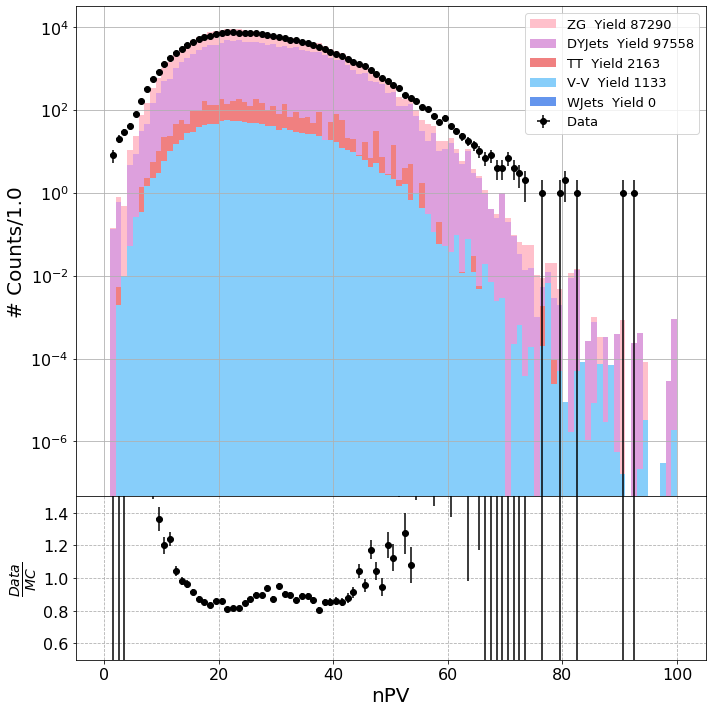

----------------met----------------
[0.0, 100.0] [0.0, 2.5, 5.0, 7.5, 10.0, 12.5, 15.0, 17.5, 20.0, 22.5, 25.0, 27.5, 30.0, 32.5, 35.0, 37.5, 40.0, 42.5, 45.0, 47.5, 50.0, 52.5, 55.0, 57.5, 60.0, 62.5, 65.0, 67.5, 70.0, 72.5, 75.0, 77.5, 80.0, 82.5, 85.0, 87.5, 90.0, 92.5, 95.0, 97.5, 100.0]


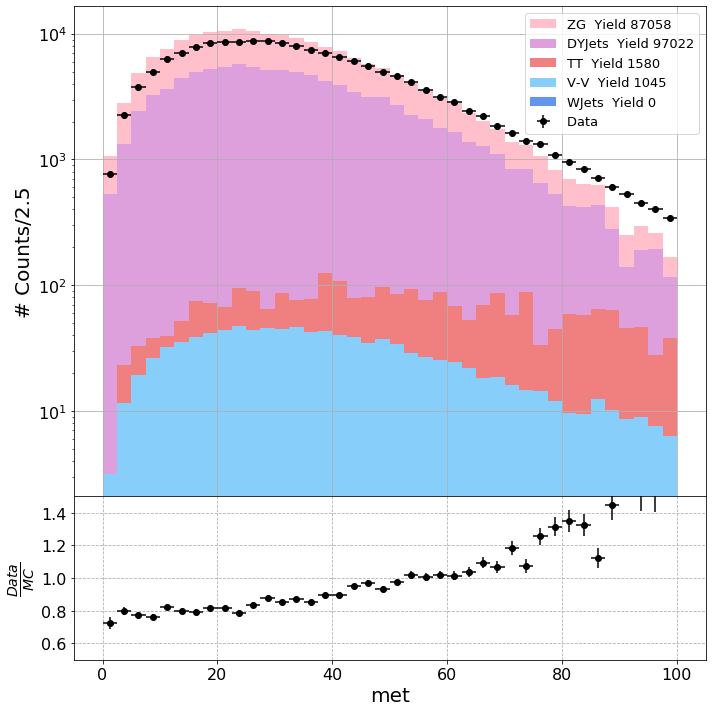

----------------leptonOnePt----------------
[25.0, 140.0] [20.0, 22.0, 24.0, 26.0, 28.0, 30.0, 32.0, 34.0, 36.0, 38.0, 40.0, 42.0, 44.0, 46.0, 48.0, 50.0, 52.0, 54.0, 56.0, 58.0, 60.0, 62.0, 64.0, 66.0, 68.0, 70.0, 72.0, 74.0, 76.0, 78.0, 80.0, 82.0, 84.0, 86.0, 88.0, 90.0, 92.0, 94.0, 96.0, 98.0, 100.0, 102.0, 104.0, 106.0, 108.0, 110.0, 112.0, 114.0, 116.0, 118.0, 120.0, 122.0, 124.0, 126.0, 128.0, 130.0, 132.0, 134.0, 136.0, 138.0]


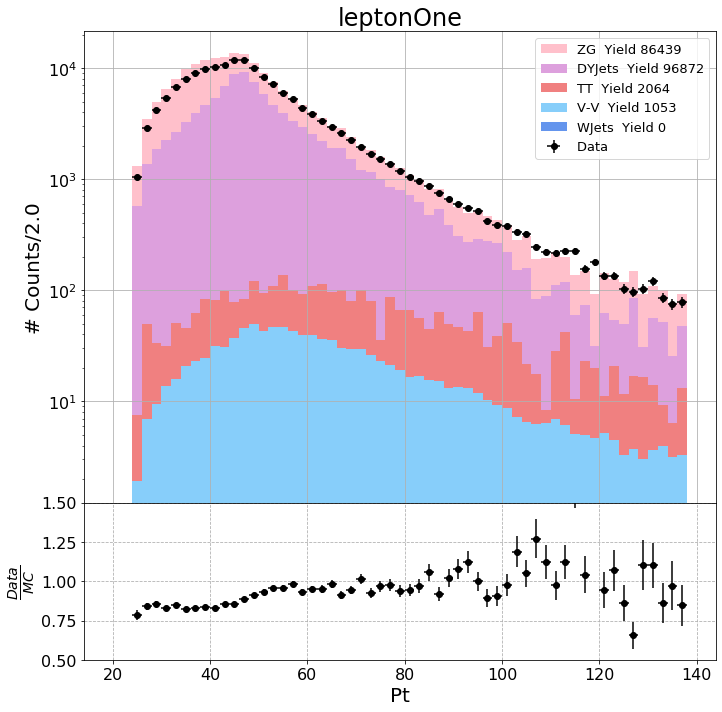

----------------leptonOnePhi----------------
[-3.141592653589793, 3.141592653589793] [-3.141592653589793, -2.9321531433504737, -2.722713633111154, -2.5132741228718345, -2.303834612632515, -2.0943951023931957, -1.8849555921538759, -1.6755160819145565, -1.4660765716752369, -1.2566370614359172, -1.0471975511965979, -0.8377580409572785, -0.6283185307179586, -0.41887902047863923, -0.20943951023931984, 0.0, 0.2094395102393194, 0.4188790204786388, 0.6283185307179586, 0.837758040957278, 1.0471975511965974, 1.2566370614359172, 1.4660765716752362, 1.675516081914556, 1.8849555921538759, 2.094395102393195, 2.3038346126325147, 2.5132741228718345, 2.7227136331111534, 2.9321531433504733, 3.141592653589793]


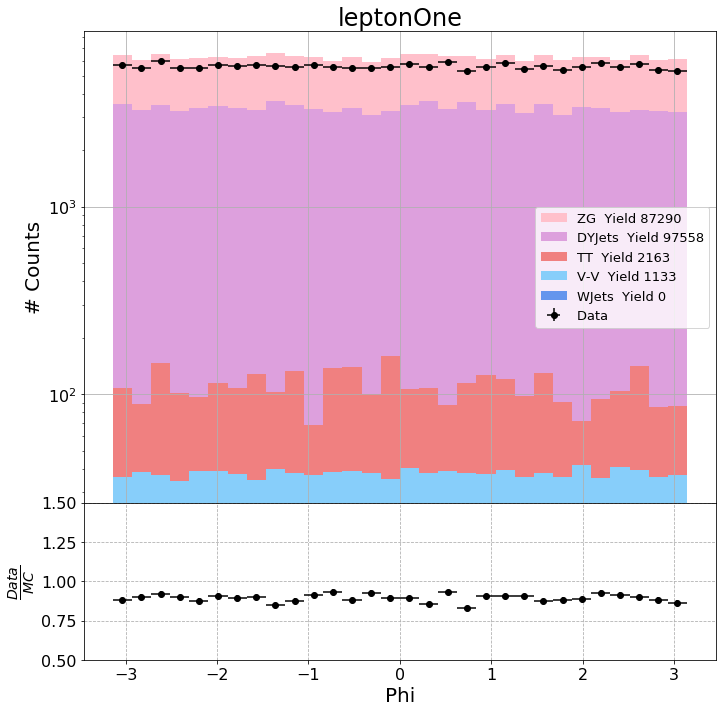

----------------leptonOneEta----------------
[-3.141592653589793, 3.141592653589793] [-3.141592653589793, -2.9321531433504737, -2.722713633111154, -2.5132741228718345, -2.303834612632515, -2.0943951023931957, -1.8849555921538759, -1.6755160819145565, -1.4660765716752369, -1.2566370614359172, -1.0471975511965979, -0.8377580409572785, -0.6283185307179586, -0.41887902047863923, -0.20943951023931984, 0.0, 0.2094395102393194, 0.4188790204786388, 0.6283185307179586, 0.837758040957278, 1.0471975511965974, 1.2566370614359172, 1.4660765716752362, 1.675516081914556, 1.8849555921538759, 2.094395102393195, 2.3038346126325147, 2.5132741228718345, 2.7227136331111534, 2.9321531433504733, 3.141592653589793]


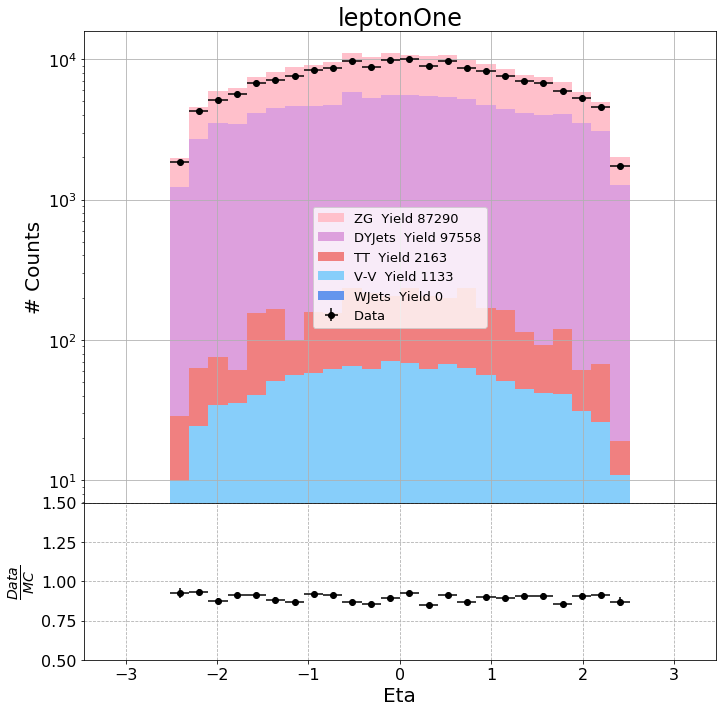

----------------leptonTwoPt----------------
[20.0, 140.0] [20.0, 22.0, 24.0, 26.0, 28.0, 30.0, 32.0, 34.0, 36.0, 38.0, 40.0, 42.0, 44.0, 46.0, 48.0, 50.0, 52.0, 54.0, 56.0, 58.0, 60.0, 62.0, 64.0, 66.0, 68.0, 70.0, 72.0, 74.0, 76.0, 78.0, 80.0, 82.0, 84.0, 86.0, 88.0, 90.0, 92.0, 94.0, 96.0, 98.0, 100.0, 102.0, 104.0, 106.0, 108.0, 110.0, 112.0, 114.0, 116.0, 118.0, 120.0, 122.0, 124.0, 126.0, 128.0, 130.0, 132.0, 134.0, 136.0, 138.0]


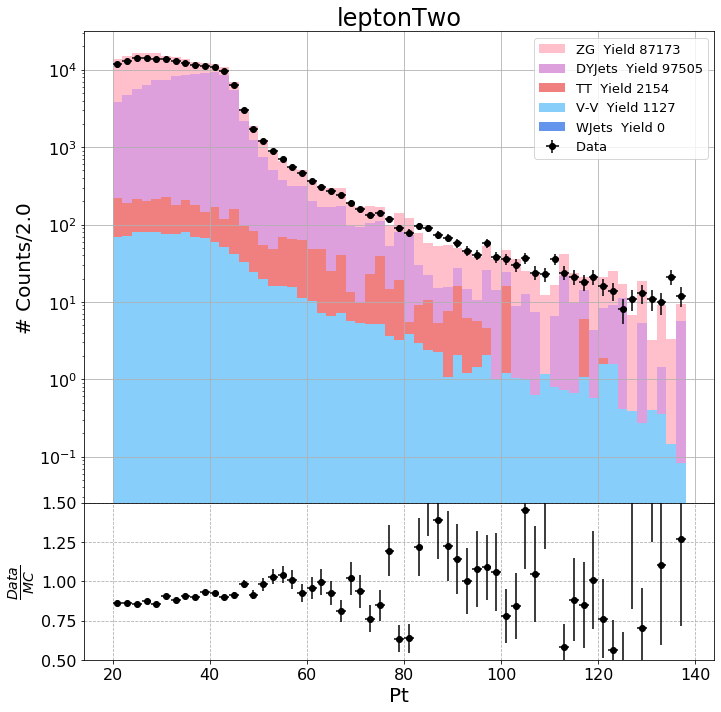

----------------leptonTwoPhi----------------
[-3.141592653589793, 3.141592653589793] [-3.141592653589793, -2.9321531433504737, -2.722713633111154, -2.5132741228718345, -2.303834612632515, -2.0943951023931957, -1.8849555921538759, -1.6755160819145565, -1.4660765716752369, -1.2566370614359172, -1.0471975511965979, -0.8377580409572785, -0.6283185307179586, -0.41887902047863923, -0.20943951023931984, 0.0, 0.2094395102393194, 0.4188790204786388, 0.6283185307179586, 0.837758040957278, 1.0471975511965974, 1.2566370614359172, 1.4660765716752362, 1.675516081914556, 1.8849555921538759, 2.094395102393195, 2.3038346126325147, 2.5132741228718345, 2.7227136331111534, 2.9321531433504733, 3.141592653589793]


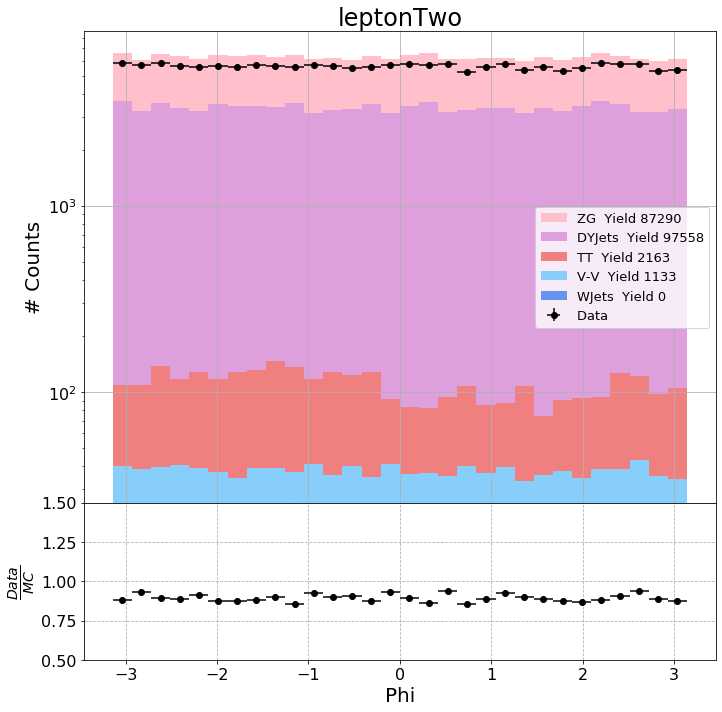

----------------leptonTwoEta----------------
[-3.141592653589793, 3.141592653589793] [-3.141592653589793, -2.9321531433504737, -2.722713633111154, -2.5132741228718345, -2.303834612632515, -2.0943951023931957, -1.8849555921538759, -1.6755160819145565, -1.4660765716752369, -1.2566370614359172, -1.0471975511965979, -0.8377580409572785, -0.6283185307179586, -0.41887902047863923, -0.20943951023931984, 0.0, 0.2094395102393194, 0.4188790204786388, 0.6283185307179586, 0.837758040957278, 1.0471975511965974, 1.2566370614359172, 1.4660765716752362, 1.675516081914556, 1.8849555921538759, 2.094395102393195, 2.3038346126325147, 2.5132741228718345, 2.7227136331111534, 2.9321531433504733, 3.141592653589793]


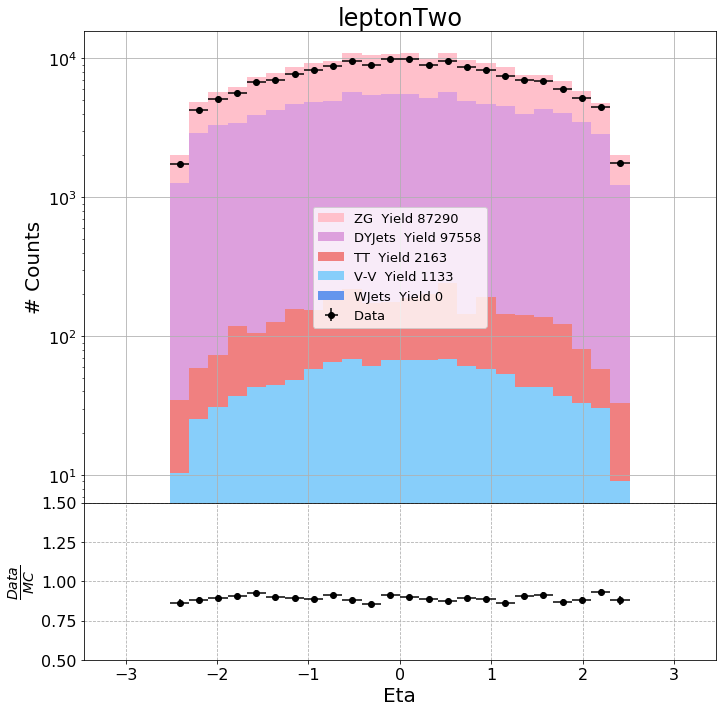

----------------leptonTwo_EEPt----------------
[20.0, 140.0] [20.0, 22.0, 24.0, 26.0, 28.0, 30.0, 32.0, 34.0, 36.0, 38.0, 40.0, 42.0, 44.0, 46.0, 48.0, 50.0, 52.0, 54.0, 56.0, 58.0, 60.0, 62.0, 64.0, 66.0, 68.0, 70.0, 72.0, 74.0, 76.0, 78.0, 80.0, 82.0, 84.0, 86.0, 88.0, 90.0, 92.0, 94.0, 96.0, 98.0, 100.0, 102.0, 104.0, 106.0, 108.0, 110.0, 112.0, 114.0, 116.0, 118.0, 120.0, 122.0, 124.0, 126.0, 128.0, 130.0, 132.0, 134.0, 136.0, 138.0]


/home/jcordero/CMS/SMP_ZGamma/python/Plotter/Plotter.py:171: RuntimeWarning: invalid value encountered in less
  Yield.append(np.sum(wei[i][np.array(data[i].GetWithCuts(part+var+ph)) < bins[-1] ]))
/home/jcordero/CMS/SMP_ZGamma/envSMP/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/home/jcordero/CMS/SMP_ZGamma/envSMP/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


ValueError: range parameter must be finite.

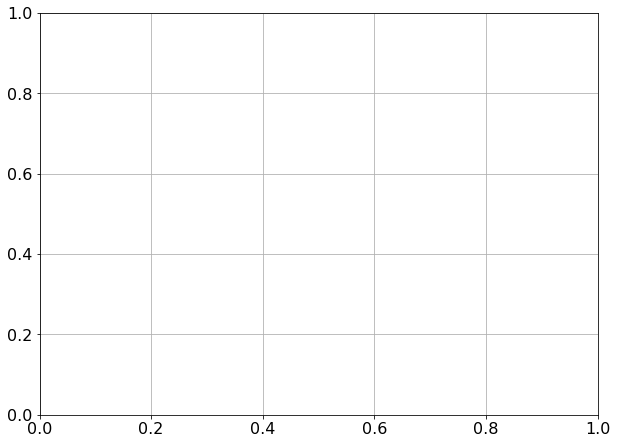

In [26]:
#Plotter.Plot(data['Sig'],part='photonOne',var='Pt')
for log in [True,False]:
    Single_Ploting(Plotter=Plotter,
                       data=data['Sig'],
                       log = log,
                       stacked = True,
                       weightCorrection = True,
                       Blind            = True, 
                       Plotting         = True,
                       StatInclude      = False,
                      )

In [ ]:
Plotter.Plot(data['Sig'],part='leptonOne_EE',var='Pt',Blind=False)

In [ ]:
Plotter.Help.GET_RangeBins(part="leptonOne",var="Pt",ph="_EE")
samp = list(np.arange(1,10,step=1))
samp.append(np.inf)
plt.hist(samp,
        range = [1,5],
        bins = [1,2,3,4,5,6,7],
        weights = np.arange(1,11,step=1))

In [ ]:
for d in data['Sig']:
    print(d.name,end = " ")
    try:
        print(max(d.GetWithCuts('leptonOnePt_EE')),
              min(d.GetWithCuts('leptonOnePt_EE')))
    except:
        print()

# Extracting Ich in sideband region using fit in the Signal Region, binned in Eta and Another variable

In [ ]:
part = ['photonOne','leptonOne','leptonTwo']
var = ['Pt']
ph = ''

IchRanges = {}

for p in part:
    for v in var:
        print('---------',p+v+ph,'-----------')
        IchRanges[p+v+ph] = pd.read_csv(pathSelections+'/OptimalIchRange/'+p+v+ph+'.csv')

In [ ]:
part = ['dilepton','llg']
var = ['Pt','M']
ph = ''


for p in part:
    for v in var:
        print('---------',p+v+ph,'-----------')
        IchRanges[p+v+ph] = pd.read_csv(pathSelections+'/OptimalIchRange/'+p+v+ph+'.csv')

In [ ]:
part = ['dilepton','l1Photon','l2Photon','dileptonPhoton']
var  = ['DEta','DPhi','DR']

ph   = ''

for p in part:
    for v in var:
        print('---------',p+v+ph,'-----------')
        IchRanges[p+v+ph] = pd.read_csv(pathSelections+'/OptimalIchRange/'+p+v+ph+'.csv')

In [ ]:
def ExtractFitValues(data,
                     part,var,ph,
                     IchRanges):
    
    ##################

    h = {}
    h['Sig']     = {}
    h['Inv Sig'] = {}

    Template = {}
    Template['ZGToLLG'] = {}
    Template['DYJets']  = {}

    ############

    Region = 'Sig'
    for i in range(len(data[Region])):
        #data[Region][i].ResetCuts()
        h[Region][data[Region][i].name],Bins = FindRegionInSideband(data[Region][i],part=part,var=var,ph=ph)

    #############

    Region = 'Inv Sig'

    DYJets = np.array(data[Region])[Names=='DYJets'][0]

    for i in range(len(data[Region])):
        #data[Region][i].ResetCuts()
        h[Region][data[Region][i].name],Bins = FindRegionInSideband(data[Region][i],part=part,var=var,ph=ph)


    #Ich = DYJets.GetWithCuts('photonOneIch')   
    Ich = DYJets.df.photonOneIch
    
    InitialCuts = DYJets.cuts 
    
    #############

    FIT= {}


    for eta in Bins['photonOneEta']:
        etaS = str(eta)

        #####################
        FIT[etaS] = {}

        Template['ZGToLLG'][etaS] = {}
        Template['DYJets'] [etaS]  = {}
        #####################

        for var1,j in zip(Bins[part+var+ph],range(len(Bins[part+var+ph]))):
            var1S = str(var1)

            ############################

            ichConvert = [float(f) for f in IchRanges[part+var+ph][etaS][j].replace(']','').replace('[','').replace(',','').split(' ')]
            ichLow  = ichConvert[0]
            ichHigh = ichConvert[1]

            #############################
            Region = 'Inv Sig'
            
            DYJets.ResetCuts(InitialCuts)
            DYJets.AddCuts(np.logical_and(Ich > ichLow, Ich < ichHigh))
            h[Region]['DYJets'],Bins = FindRegionInSideband(DYJets,part=part,var=var,ph=ph)

            #####################

            T = h['Sig']['ZGToLLG'][etaS][var1S][0]

            if np.sum(T) == 0:
                Template['ZGToLLG'][etaS][var1S] = T
            else:
                Template['ZGToLLG'][etaS][var1S] = T/np.sum(T)

            #####################

            T = h['Inv Sig']['DYJets'][etaS][var1S][0]


            if np.sum(T) == 0:
                Template['DYJets'][etaS][var1S] = T
            else:
                Template['DYJets'][etaS][var1S] = T/np.sum(T)

            ##############################################

            Temp = lambda NSig,NBkg: NSig*np.array(Template['ZGToLLG'][etaS][var1S]) + \
                                     NBkg*np.array(Template['DYJets' ][etaS][var1S])

            ###########
            # FITTING
            fit = Fit(data = h['Sig']['DoubleMuon_2017'][etaS][var1S][0],
                      Yield = Temp
                     )

            NYield = fit.values
            NSigma = fit.errors
            ###########

            FIT[etaS][var1S] = [NYield,NSigma]


    DYJets.ResetCuts(InitialCuts)
    
    return FIT, h, Template, Bins

In [ ]:
def GenerateBkg(part,var,ph,
                FIT,Bins):
    Signal, Background = {},{}
    SigmaS, SigmaB = {},{}

    for eta in Bins['photonOneEta']: 
        etaS = str(eta)

        Signal[etaS]     = []
        Background[etaS] = []
        SigmaS[etaS] = []
        SigmaB[etaS] = []
        for var1, j in zip(Bins[part+var+ph], range(len(Bins[part+var+ph]))):
            var1S = str(var1)

            NSig = FIT[etaS][var1S][0][0]
            NBkg = FIT[etaS][var1S][0][1]

            SigmaSig = FIT[etaS][var1S][1][0]
            SigmaBkg = FIT[etaS][var1S][1][0]

            Signal[etaS]    .append(NSig)
            Background[etaS].append(NBkg)

            SigmaS[etaS].append(SigmaSig)
            SigmaB[etaS].append(SigmaBkg)

            #print(var1S, NBkg)

    return Signal, Background, SigmaS, SigmaB 

In [ ]:
def HistogramingVariables(
                         data,
                         part,var,ph,
                         Bins, Background,
                         DataDriven = False,
                         ):    
    VAR,X = {},{}
    ranges,B = Help.GET_RangeBins(part,var,ph, Blind=False,Plotting=Plotting)

    cuts = [d.cuts for d in data]

    for eta in Bins['photonOneEta']: 
        etaS = str(eta)

        VAR[etaS] = []
        X[etaS] = []
        for d,c in zip(data,cuts):
            d.ResetCuts(c)
            if not d.df.empty:
                d.AddCuts(np.logical_and(np.abs(d.df.photonOneEta) > eta[0],
                                         np.abs(d.df.photonOneEta) < eta[1]
                                        )
                         )

            HH =Plotter.BinnedHist(data = d, var = var, part = part,)
            if DataDriven:
                INDB = np.logical_not(np.isnan(Background[etaS]))
            else:
                INDB = np.ones(len(HH[0]),dtype=np.bool)

            VAR[etaS].append(HH[0][INDB])
            IND = list(INDB)
            IND.append(True)
            IND = np.array(IND)
            X[etaS].append(HH[1][IND])

        xc = []
        for x in X[etaS]:
            xc.append((x[1:]+x[:-1])/2)
        X[etaS] = np.array(X[etaS])

        VAR[etaS] = np.array(VAR[etaS])
        if DataDriven:
            VAR[etaS][Names=='DYJets'] = np.array(Background[etaS])[INDB]

    for d,c in zip(data,cuts):
        d.ResetCuts(c)
    return VAR,X,ranges

In [ ]:
def Plotting(data,part,var,ph,DataDriven = True):
    
    FIT,h,Template = None,None,None
    
    if DataDriven:
        FIT,h,Template,Bins = ExtractFitValues(data,part,var,ph,IchRanges)

        Sig,Background, SigmaS, SigmaB  = GenerateBkg(part,var,ph,FIT,Bins)
    else: 
        h,Bins = FindRegionInSideband(data['Sig'][-1],part=part,var=var,ph=ph)
        Background = None

    VAR,X,ranges = HistogramingVariables(data = data['Sig'],
                                          part=part,var=var,ph=ph,
                                          Bins=Bins, Background = Background,
                                          DataDriven = DataDriven,
                                        )
    for log in [True,False]:
        for eta,phType in zip(Bins['photonOneEta'],['EB','EE']): 
            etaS = str(eta)
            Plotter.Plot_Bin(
                         VAR    = VAR[etaS], wei    =  VAR[etaS],
                         label  =     Names, colors =      color,
                         ranges =    ranges, bins   = X[etaS][0],
                         var              = var,
                         part             = part,
                         signalInclude    = True,
                         stacked          = True,
                         density          = False,
                         log              = log,
                         Plotting         = True,
                         Blind            = True,
                         StatInclude      = False,
                         index            = phType,
                        );
    return h,Template,FIT,Bins

In [ ]:
def PlotTemplateFits(data,part,var,ph,h,Template,FIT,Bins):
    Names = np.array([d.name for d in data['Sig']])
    DYJets = np.array(data['Inv Sig'])[Names=='DYJets'][0]
    
    for eta in Bins['photonOneEta']: 
        etaS = str(eta)

        fig = plt.figure(figsize=(15,40))


        print(etaS)
        for var1, j in zip(Bins[part+var+ph], range(len(Bins[part+var+ph]))):
            var1S = str(var1)

            plt.subplot( np.ceil(len(IchRanges[part+var+ph][etaS])/4.0),4, j+1)

            #####################################

            ichConvert = [float(f) for f in IchRanges[part+var+ph][etaS][j].replace(']','').replace('[','').replace(',','').split(' ')]
            ichLow  = ichConvert[0]
            ichHigh = ichConvert[1]
            

            DYJets.ResetCuts()
            Ich = DYJets.GetWithCuts('photonOneIch')   
            DYJets.AddCuts(np.logical_and(Ich > ichLow, Ich < ichHigh))
            h['Inv Sig']['DYJets'],Bins = FindRegionInSideband(DYJets,part=part,var=var,ph=ph)

            ######################################

            Temp = lambda NSig,NBkg: NSig*np.array(Template['ZGToLLG'][etaS][var1S]) + NBkg*np.array(Template['DYJets'][etaS][var1S])

            NSig = FIT[etaS][var1S][0][0]
            NBkg = FIT[etaS][var1S][0][1]

            ####################################################################

            x = np.array(h['Sig']['DoubleMuon_2017'][etaS][var1S][1])
            xc = (x[:-1] + x[1:])/2
            bins = np.arange(-1,1.1,step=0.1)


            H = plt.plot(
                    xc,h['Sig']['DoubleMuon_2017'][etaS][var1S][0],
                    color     = 'k',
                    linewidth = 0,
                    marker    = 'o',
                    label     = 'Data',
                    )


            plt.hist(
                    xc,
                    bins      = bins,
                    weights   = Temp(NSig,NBkg),
                    color     = 'b',
                    histtype  = 'step',
                    linewidth = 1.5,
                    label     = 'Template',
                    )

            plt.hist(
                    xc,
                    bins      = bins,
                    weights   = NSig*np.array(Template['ZGToLLG'][etaS][var1S]),
                    color     = 'r',
                    histtype  = 'step',
                    linewidth = 1.5,
                    label     = 'Signal',
                    )

            plt.hist(
                    xc,
                    bins      = bins,
                    weights   = NBkg*np.array(Template['DYJets'][etaS][var1S]),
                    color     = 'g',
                    histtype  = 'step',
                    linewidth = 1.5,
                    label     = 'Bkg',
                    )       
            
            R = round(np.sum(h['Sig']['DoubleMuon_2017'][etaS][var1S][0])/(NBkg+np.sum(h['Sig']['ZGToLLG'][etaS][var1S][0])), 2)
            
            Title = 'Ich' + IchRanges[part+var+ph][etaS][j] + \
                    ' Var [' + str(round(var1[0],2)) +', '+ str(round(var1[1],2)) +']'\
                    ' R: ' + str(R) + \
                    ' NB:' +str(round(NBkg,0))
            plt.title(Title,fontsize=12)
            plt.legend()

            ax = plt.gca()

        plt.tight_layout()
        plt.show()
        
        if etaS == '[0, 1.4666]' or etaS == '[-1.4666, 0]':
            phType = 'EB'
        elif etaS == '[1.4666, 2.5]' or etaS == '[-2.5, -1.4666]':
            phType = 'EE'
            
        fig.savefig(figpath+'MVAFits_'+part+var+ph+'_'+phType+'.png')

In [ ]:
def RecordTemplates(path,Templates,
                   part='',var='',ph=''):
    for tempType in ['ZGToLLG','DYJets']:
        for eta in Templates['ZGToLLG']:
            if eta == '[0, 1.4666]':
                phType = 'EB'
            else:
                phType = 'EE'
                
            MVABins = Help.BinFormat(Bins = (np.arange(-1,1.1,step=0.1)), Type='ranges')
            MVABins = [str(mva) for mva in MVABins]
            df = pd.DataFrame(Templates[tempType][eta],
                              columns = list(Templates[tempType][eta].keys()),
                              index = MVABins,
                             )


            df.to_csv(path+'/Templates/Templates_'+tempType+'_'+part+var+ph+'_'+phType+'.csv')

In [ ]:
def RecordFits(path,Fits,
                   part='',var='',ph=''):

    for eta in Fits:
        if eta == '[0, 1.4666]':
            phType = 'EB'
        else:
            phType = 'EE'

        FIT = {}
        FIT['NSig'] = []
        FIT['NBkg'] = []
        FIT['NSigSigma'] = []
        FIT['NBkgSigma'] = []
        NSig,NBkg,NSigmaSig, NSigmaBkg = [],[],[],[]
        for var1 in list(Fits[eta].keys()):
            FIT['NSig'].append(Fits[eta][var1][0][0])
            FIT['NBkg'].append(Fits[eta][var1][0][1])
            
            FIT['NSigSigma'].append(Fits[eta][var1][1][0])
            FIT['NBkgSigma'].append(Fits[eta][var1][1][1])
            

        df = pd.DataFrame(FIT,
                          columns = list(FIT.keys()),
                          index = list(Fits[eta].keys()),
                         )


        df.to_csv(path+'/Fits/Fit_'+part+var+ph+'_'+phType+'.csv')

In [ ]:
def PLOT(DataDriven=True, PlotFits = True,PlotType='All'):
                  
    if not DataDriven:
        PlotFits      = False
        SaveTemplates = False
    else:
        SaveTemplates = True
        
    ##############################
    if PlotType == 'XSec':
        part = ['photonOne']
        var = ['Pt']
        ph = ''
        for p in part:
            for v in var:
                print('-----------',p+v,'-----------')
                h,Template,FIT,Bins = Plotting(data,part=p,var=v,ph=ph,DataDriven = DataDriven)
                if PlotFits:
                    PlotTemplateFits(data,part=p,var=v,ph=ph,h=h,Template=Template,FIT=FIT,Bins=Bins)
                if SaveTemplates:
                    RecordTemplates(path,Template,part=p,var=v,ph=ph)
                    RecordFits(path,FIT,part=p,var=v,ph=ph)
                
        return FIT
    ##############################
    
    if PlotType == 'Pt' or PlotType == 'All':
        part = ['leptonOne','leptonTwo','photonOne','dilepton','llg']
        var = ['Pt']
        ph = ''
        for p in part:
            for v in var:
                print('-----------',p+v,'-----------')
                h,Template,FIT,Bins = Plotting(data,part=p,var=v,ph=ph,DataDriven = DataDriven)
                if PlotFits:
                    PlotTemplateFits(data,part=p,var=v,ph=ph,h=h,Template=Template,FIT=FIT,Bins=Bins)
                if SaveTemplates:
                    RecordTemplates(path,Template,part=p,var=v,ph=ph)
                    RecordFits(path,FIT,part=p,var=v,ph=ph)
                

    ##############################

    if PlotType == 'M' or PlotType == 'All':
        part = ['dilepton','llg']
        var = ['M']
        ph = ''
        for p in part:
            for v in var:
                print('-----------',p+v,'-----------')
                h,Template,FIT,Bins = Plotting(data,part=p,var=v,ph=ph,DataDriven = DataDriven)
                if PlotFits:
                    PlotTemplateFits(data,part=p,var=v,ph=ph,h=h,Template=Template,FIT=FIT,Bins=Bins) 
                if SaveTemplates:
                    RecordTemplates(path,Template,part=p,var=v,ph=ph)
                    RecordFits(path,FIT,part=p,var=v,ph=ph)
                
    ##############################
    if PlotType == 'Ang' or PlotType == 'All':
        part = ['dilepton','l1Photon','l2Photon','dileptonPhoton']
        var = ['DEta','DPhi','DR']
        ph = ''
        
        for p in part:
            for v in var:
                print('-----------',p+v,'-----------')
                h,Template,FIT,Bins = Plotting(data,part=p,var=v,ph=ph,DataDriven = DataDriven)
                if PlotFits:
                    PlotTemplateFits(data,part=p,var=v,ph=ph,h=h,Template=Template,FIT=FIT,Bins=Bins)
                if SaveTemplates:
                    RecordTemplates(path,Template,part=p,var=v,ph=ph)
                    RecordFits(path,FIT,part=p,var=v,ph=ph)

In [ ]:
#DataDriven = False
DataDriven = True

PlotFits = False
#PlotFits = True

#PlotType = 'All'
#PlotType = 'Pt'
#PlotType = 'M'
#PlotType = 'Ang'
PlotType = 'XSec'

Fits = PLOT(DataDriven=DataDriven, PlotFits = PlotFits,PlotType = PlotType)

In [ ]:
part = 'photonOne'
var  = 'Pt'


h,Template,FIT,Bins = Plotting(data,part=part,var=var,ph=ph,DataDriven = DataDriven)

In [ ]:
def ConvertToFloat(string):
    return [float(v) for v in string.replace('[','').replace(']','').replace(',','').split(' ')]

In [ ]:
N = {}
N['Sig']  = {}
for eta in Fits.keys():
    x = []
    N['Sig'][eta] = []

    for var1 in Fits[eta].keys():
        x.append(ConvertToFloat(var1))
        N['Sig'][eta].append(Fits[eta][var1][0][0])

In [ ]:
from matplotlib import rc
rc('text', usetex=False)

In [ ]:
eta = '[0, 1.4666]'

xsec = np.array(N['Sig'][eta])/data['Sig'][-2].Topo._GetLumi('2017')

xc = Help.BinFormat(Bins=x,Type='center')
xb = Help.BinFormat(Bins=x,Type='edges')

plt.figure(figsize=(8,8))
plt.hist(
        xc,
        bins      = xb,
        weights   = xsec,
        histtype  = 'stepfilled',
        linewidth = 1.5,
        color     = 'deepskyblue',
        label     = 'Signal', 
        )
ax = plt.gca()
ax.set_title(part)
ax.set_ylabel(r'$\frac{d\sigma}{d p_T}$')
ax.set_xlabel(r'$p_T$')
ax.set_yscale('log')
ax.legend()

In [ ]:
part = ''
var  = 'nJets'

Plotter.Plot(data['Sig'],
             var              = var,
             part             = part,
             signalInclude    = False,
             stacked          = True,
             density          = False,
             log              = True,
             weightCorrection = True,
             Plotting         = True,
             Blind            = True,
             StatInclude      = False,
             index            = 0,
            )

In [ ]:
part = 'dilepton'
var  = 'M'


Plotting(data,part=part,var=var,ph=ph,DataDriven = DataDriven);

In [ ]:
for d in data['Sig']:
    d.ResetCuts()
for d in data['Inv Sig']:
    d.ResetCuts()

In [ ]:

DataDriven = True
###################################
FIT,h,Template = None,None,None

if DataDriven:
    FIT,h,Template,Bins = ExtractFitValues(data,part,var,ph,IchRanges)

    Sig,Background, SigmaS, SigmaB  = GenerateBkg(part,var,ph,FIT,Bins)
else: 
    h,Bins = FindRegionInSideband(data['Sig'][-1],part=part,var=var,ph=ph)
    Background = None

VAR,X,ranges = HistogramingVariables(data = data['Sig'],
                                      part=part,var=var,ph=ph,
                                      Bins=Bins, Background = Background,
                                      DataDriven = DataDriven,
                                    )
#for log in [True,False]:
for eta,phType in zip(Bins['photonOneEta'],['EB','EE']): 
    etaS = str(eta)
    Plotter.Plot_Bin(
                 VAR    = VAR[etaS], wei    =  VAR[etaS],
                 label  =     Names, colors =      color,
                 ranges =    ranges, bins   = X[etaS][0],
                 var              = var,
                 part             = part,
                 signalInclude    = True,
                 stacked          = True,
                 density          = False,
                 log              = log,
                 Plotting         = True,
                 Blind            = True,
                 StatInclude      = False,
                 index            = phType,
                );

In [ ]:
np.sum(data['Inv Sig'][-3].cuts)